In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

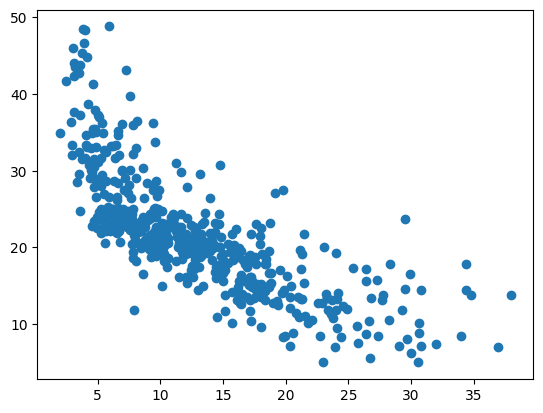

In [4]:
boston = fetch_openml(name="boston", version=1,
as_frame=False)
x = boston.data[:,12]
y = boston.target

x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

In [6]:
np.random.seed(666)
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.2, random_state=666)



In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegreesion(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('reg', LinearRegression()),
    ])


In [14]:
poly_reg = PolynomialRegreesion(degree=20)
poly_reg.fit(x_train, y_train)

,steps,"[('poly', ...), ('std_scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,20
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [15]:
from sklearn.metrics import mean_squared_error
y_pred = poly_reg.predict(x_test)
mean_squared_error(y_test, y_pred)

18254.75221300983

In [16]:
def show_plot(model):
    plt.scatter(x, y)
    X_plot = np.linspace(0, 40, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot[:,0], y_plot, color='red')
    plt.axis([0, 40, 0, 50])
    plt.show()

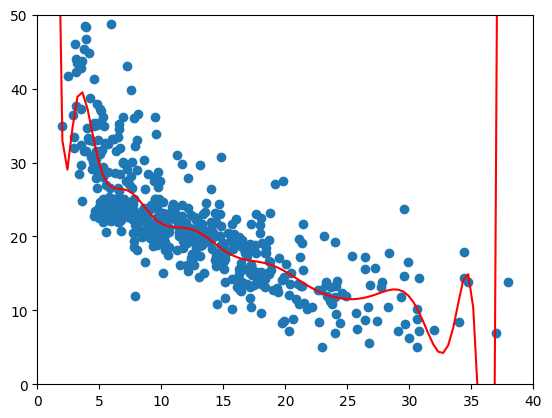

In [17]:
show_plot(poly_reg)

In [18]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('reg', Lasso(alpha=alpha)),
    ])

In [26]:
lasso_reg = LassoRegression(20, 0.01)
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
mean_squared_error(y_test, y_pred)

21.220084396609394

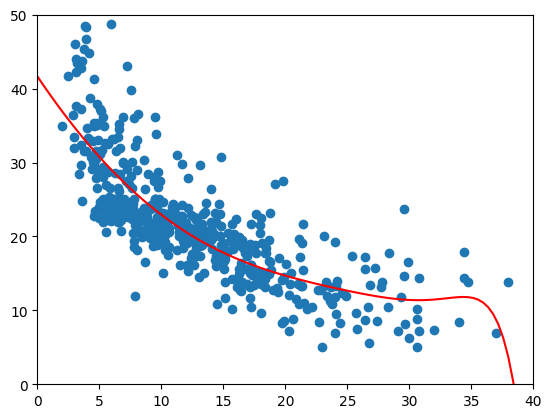

In [27]:
show_plot(lasso_reg)

## 岭回归

In [28]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('reg', Ridge(alpha=alpha)),
    ])


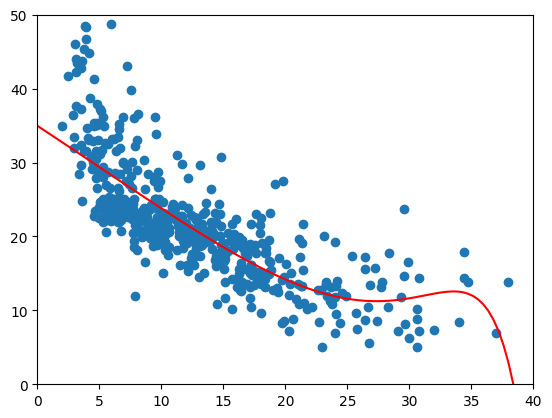

In [32]:
ridge_reg = RidgeRegression(20, 10)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
mean_squared_error(y_test, y_pred)
show_plot(ridge_reg)

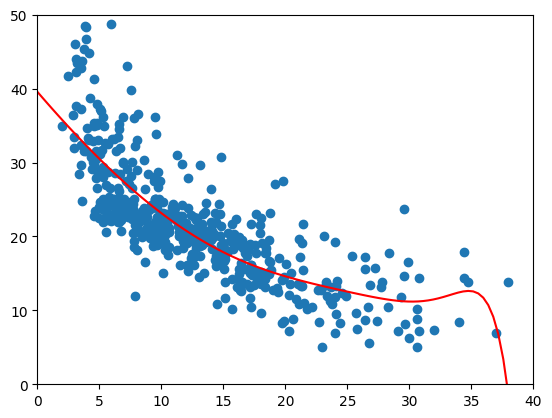

In [33]:
ridge_reg = RidgeRegression(20, 1)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
mean_squared_error(y_test, y_pred)
show_plot(ridge_reg)